In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

## Models of Stock Return

In [130]:
aapl = pd.read_csv("./csv/apple.csv", index_col="Date")
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800
2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200
2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700
2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800
2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700
...,...,...,...,...,...,...
2017-12-22,174.679993,175.419998,174.500000,175.009995,174.299362,16349400
2017-12-26,170.800003,171.470001,169.679993,170.570007,169.877396,33185500
2017-12-27,170.100006,170.779999,169.710007,170.600006,169.907272,21498200


<Axes: xlabel='Date'>

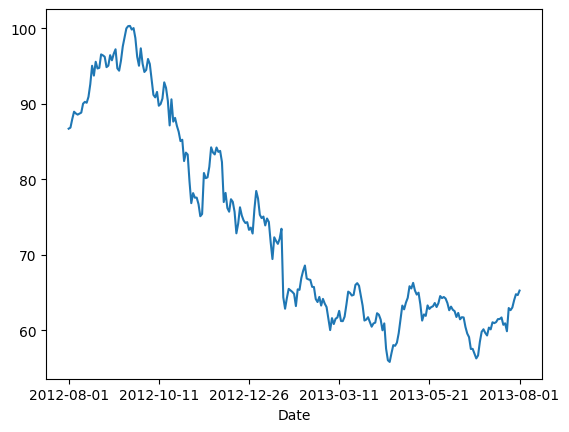

In [131]:
aapl.loc["2012-08-01":"2013-08-01", "Close"].plot()

## Distribution of Log return

In [132]:
# calculating the log daily return
aapl['LogReturn'] = np.log(aapl['Close']).shift(-1) - np.log(aapl['Close'])
# Plot a histogram to show the distribution of log return of Microsoft's stock. 
# You can see it is very close to a normal distribution
aapl['LogReturn'].hist(bins=50)

<Axes: >

Error in callback <function flush_figures at 0x12f21e5c0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# normal distribution
density = pd.DataFrame()
density['x'] = np.arange(-4, 4, 0.001)
density['pdf'] = norm.pdf(density['x'], 0, 1) # probability density function
density['cdf'] = norm.cdf(density['x'], 0, 1) # cumulative distribution function

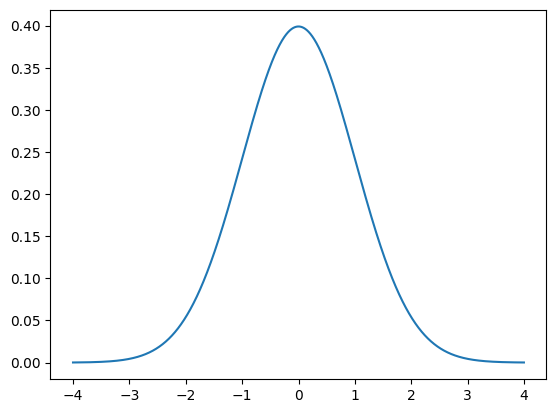

In [ ]:
# plot normal distribution
plt.plot(density['x'], density['pdf'])

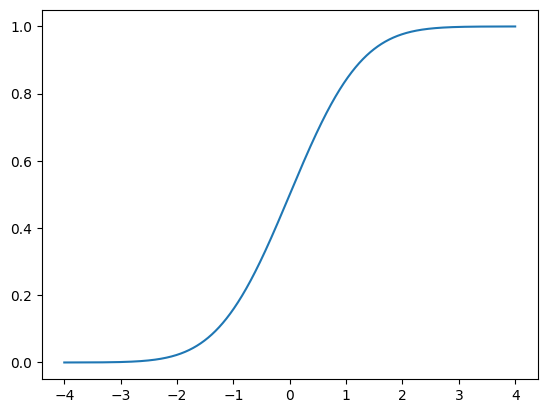

In [ ]:
plt.plot(density['x'], density['cdf'])

In [ ]:
mu = aapl["LogReturn"].mean()
sigma = aapl["LogReturn"].std(ddof=1)
print(mu, sigma)

0.000975467759150088 0.020045447615854962


In [ ]:
density_apple = pd.DataFrame()
density_apple['x'] = np.arange(-0.1, 0.1, 0.001)
density_apple['pdf'] = norm.pdf(density_apple['x'], mu, sigma)

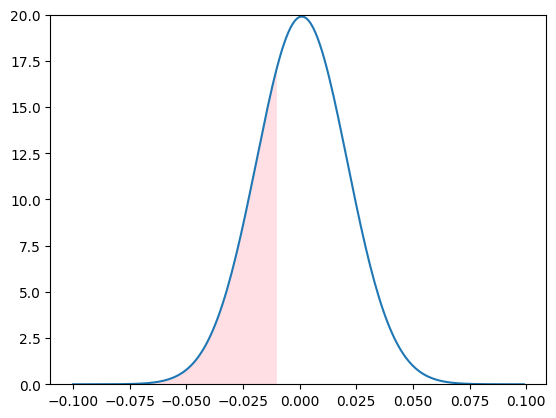

In [ ]:
plt.ylim(0, 20)
plt.plot(density_apple['x'], density_apple['pdf'])
plt.fill_between(x = np.arange(-0.1, -0.01, 0.0001),
                 y2=0,
                 y1=norm.pdf(np.arange(-0.1, -0.01, 0.0001), mu, sigma),
                 facecolor='pink',
                 alpha=0.5)

## Calculate the probability of the stock price will drop over a certain percentage in a day

In [ ]:
# probability that the stock price of microsoft will drop over 5% in a day
probability_return = norm.cdf(-0.05, mu, sigma)
probability_return

0.005495344250959507

In [ ]:
# probability that the stock price of microsoft will drop over 10% in a day
probability_return = norm.cdf(-0.1, mu, sigma)
probability_return

2.3603936652475223e-07

## Calculate the probability of the stock price will drop over a certain percentage in a year

In [ ]:
# 220 trading days in 1 year
mu220 = 220 * mu
sigma220 = 220 ** 0.5 * sigma
norm.cdf(-0.4, mu220, sigma220)

0.019361015454142632

## Calculate Value at risk (VaR)

In [ ]:
# Value at Risk (VaR)
norm.ppf(0.05, mu, sigma)

-0.031996359455654697